In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Orange3_colab/Orange3/Stroke_Preprocess/healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df['id'].isnull().sum()

0

In [7]:
#ID 변수인 id값의 중복 여부를 체크하기 위해 unique 값의 개수 체크
# pd.unique는 유일한 변숫값을 츌력하고 len은 값의 개수를 카운트
n = len(pd.unique(df['id']))
print(n)

5110


In [8]:
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df['stroke'].value_counts(dropna=False, normalize=True) #normalize는 비율 분포를 알려줌 #dropna는 결측값 개수를 알려줌

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [10]:
cols = ['age', 'avg_glucose_level', 'bmi'] #구간 변수를 cols에 저장
df[cols].dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [13]:
pd.options.display.float_format = '{:.2f}'.format  # 소수점 2자리로 숫자 표기 제한
df[cols].describe()

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.25,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [14]:
c = df['age'] > 18
df[c].head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [15]:
df1 = df[c] #데이터프레임 df[c]를 df1에 저장

In [16]:
#Residence_type 변수명을 소문자로 시작하게 변경
df1 = df1.rename(columns = {'Residence_type' : 'residence_type'})

In [17]:
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
         'residence_type', 'smoking_status']
df1[cols1].isnull().sum()


gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
residence_type    0
smoking_status    0
dtype: int64

In [18]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
residence_type    object
smoking_status    object
dtype: object

In [19]:
cols = ['age', 'avg_glucose_level', 'bmi'] 
df1[cols].describe() #구간(interval) 변수의 요약 통계 구하기

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [20]:
#왜도 확인
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [21]:
#첨도 확인
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [22]:
df1['work_type'].value_counts(dropna=False) #도수분포표 구하기

Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: work_type, dtype: int64

In [24]:
#도수분포표를 표로 구성할 때는 pd.crosstab 사용
pd.crosstab(df1['work_type'], columns='count') #도수분포표를 개수 기준으로 출력

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [26]:
#frequency table 생성(비율 기준)
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


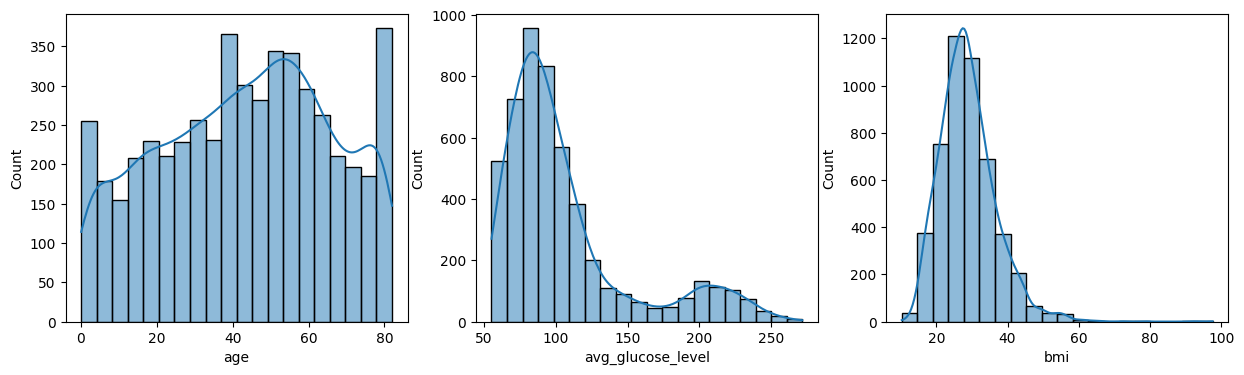

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#이상값이 있는지 시각화하여 확인
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

sns.histplot(ax=axes[0], data=df, x="age", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="avg_glucose_level", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="bmi", kde=True, bins=20);
plt.show();

<Axes: xlabel='bmi'>

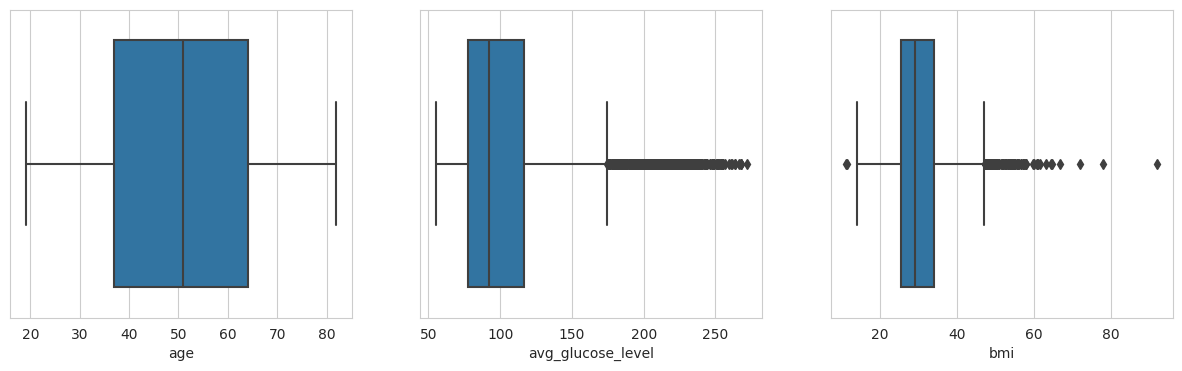

In [30]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize = (15, 4))

sns.boxplot(ax = axes[0], x = "age", data = df1)
sns.boxplot(ax = axes[1], x = "avg_glucose_level", data = df1)
sns.boxplot(ax = axes[2], x = "bmi", data = df1)

In [32]:
#IQR 계산
Q1 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [33]:
# 3*IQR 규칙에 의거한 상한과 하한 구하기
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64


In [34]:
print(Upper)

age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [35]:
#이상치 제거
c1 = df1['avg_glucose_level'] <= 232.64
c2 = df1['bmi'] <= 60.3

df2 = df1[c1 & c2]
df2.shape

(3915, 12)

In [39]:
cols = ['age', 'avg_glucose_level', 'bmi']
round(df2[cols].corr(), 2) #구간 변수 간 상관계수 출력

,age,avg_glucose_level,bmi
age,1.00,0.20,0.02
avg_glucose_level,0.20,1.00,0.16
bmi,0.02,0.16,1.00


In [40]:
df2.to_csv('/content/drive/MyDrive/Orange3_colab/Orange3/Stroke_Preprocess/healthcare-dataset-2.csv', index=False)

In [41]:
#독립 표본 t-test
from scipy import stats

data_1 = df2[df2['stroke'] == 1]['age']
data_0 = df2[df2['stroke'] == 0]['age']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=14.84966867789424, pvalue=1.4355395712390346e-48)